In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
sys.path.append('../data')
from display_data import import_data

plt.style.use('ggplot')
%matplotlib inline
#Eirik

In this notebook we will do EDA (explanatory data analysis). We will look at dataset standard statistics, individual feature analysis and finding any relations or trends considering multiple features. As a conlusion we will suggest features which can be added as a result of EDA

In [40]:
#import data
data_train, data_test = import_data()

#sometimes we have to look at all the data togheter
all_data = pd.concat([data_train,data_test])
all_data

,id,seller,price,area_total,area_kitchen,area_living,floor,rooms,layout,ceiling,...,address,constructed,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating
0,0,3.0,7139520.0,59.2,12.5,31.0,2.0,2.0,NaN,2.65,...,к2.5/2,2021.0,3.0,9.0,0.0,1.0,1.0,1.0,NaN,NaN
1,1,NaN,10500000.0,88.0,14.2,48.0,18.0,3.0,1.0,NaN,...,14к3,2010.0,3.0,25.0,0.0,1.0,1.0,1.0,NaN,0.0
2,2,3.0,9019650.0,78.5,22.5,40.8,12.0,3.0,NaN,2.65,...,38,2021.0,3.0,15.0,0.0,1.0,1.0,1.0,NaN,NaN
3,3,NaN,10500000.0,88.0,14.0,48.0,18.0,3.0,NaN,NaN,...,14к3,2010.0,3.0,25.0,0.0,1.0,1.0,1.0,NaN,0.0
4,4,NaN,13900000.0,78.0,17.0,35.0,7.0,2.0,1.0,2.90,...,1к3,2017.0,2.0,15.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9932,33217,3.0,NaN,106.0,19.9,56.7,16.0,3.0,NaN,3.30,...,10А,2020.0,2.0,20.0,0.0,1.0,1.0,0.0,NaN,0.0
9933,33218,NaN,NaN,82.0,NaN,NaN,3.0,3.0,NaN,NaN,...,к1,2021.0,2.0,20.0,0.0,1.0,1.0,1.0,NaN,NaN
9934,33219,NaN,NaN,49.3,NaN,NaN,15.0,1.0,NaN,0.00,...,70к5,2016.0,2.0,24.0,0.0,1.0,1.0,0.0,1.0,1.0
9935,33220,NaN,NaN,38.8,10.5,15.1,14.0,1.0,NaN,3.30,...,1,2019.0,NaN,14.0,1.0,1.0,1.0,0.0,1.0,NaN


,id,seller,price,area_total,area_kitchen,area_living,floor,rooms,layout,ceiling,...,address,constructed,material,stories,elevator_without,elevator_passenger,elevator_service,parking,garbage_chute,heating
0,0,3.0,7139520.0,59.2,12.5,31.0,2.0,2.0,NaN,2.65,...,к2.5/2,2021.0,3.0,9.0,0.0,1.0,1.0,1.0,NaN,NaN
1,1,NaN,10500000.0,88.0,14.2,48.0,18.0,3.0,1.0,NaN,...,14к3,2010.0,3.0,25.0,0.0,1.0,1.0,1.0,NaN,0.0
2,2,3.0,9019650.0,78.5,22.5,40.8,12.0,3.0,NaN,2.65,...,38,2021.0,3.0,15.0,0.0,1.0,1.0,1.0,NaN,NaN
3,3,NaN,10500000.0,88.0,14.0,48.0,18.0,3.0,NaN,NaN,...,14к3,2010.0,3.0,25.0,0.0,1.0,1.0,1.0,NaN,0.0
4,4,NaN,13900000.0,78.0,17.0,35.0,7.0,2.0,1.0,2.90,...,1к3,2017.0,2.0,15.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9932,33217,3.0,NaN,106.0,19.9,56.7,16.0,3.0,NaN,3.30,...,10А,2020.0,2.0,20.0,0.0,1.0,1.0,0.0,NaN,0.0
9933,33218,NaN,NaN,82.0,NaN,NaN,3.0,3.0,NaN,NaN,...,к1,2021.0,2.0,20.0,0.0,1.0,1.0,1.0,NaN,NaN
9934,33219,NaN,NaN,49.3,NaN,NaN,15.0,1.0,NaN,0.00,...,70к5,2016.0,2.0,24.0,0.0,1.0,1.0,0.0,1.0,1.0
9935,33220,NaN,NaN,38.8,10.5,15.1,14.0,1.0,NaN,3.30,...,1,2019.0,NaN,14.0,1.0,1.0,1.0,0.0,1.0,NaN


In [41]:
#Now lets look at all the basics of the data
print('Number of Training Examples = {}'.format(data_train.shape[0]))
print('Number of Test Examples = {}\n'.format(data_test.shape[0]))
print('Training X Shape = {}'.format(data_train.shape))
print('Training y Shape = {}\n'.format(data_train['price'].shape[0]))
print('Test X Shape = {}'.format(data_test.shape))
print('Test y Shape = {}\n'.format(data_test.shape[0]))
print('Train columns \n', list(data_train.columns))
print('Test columns \n', list(data_test.columns))

#check type of each column, and see how many duplicates we have:
for column in data_train.columns:
    print('\n - type of column: ', data_train.dtypes[column],'\n - number of null values: ', data_train[column].isnull().sum(), '\n - number of unique inputs: ', data_train[column].value_counts().count(),'\n', data_train[column].value_counts())


Number of Training Examples = 23285
Number of Test Examples = 9937

Training X Shape = (23285, 34)
Training y Shape = 23285

Test X Shape = (9937, 33)
Test y Shape = 9937

Train columns 
 ['id', 'seller', 'price', 'area_total', 'area_kitchen', 'area_living', 'floor', 'rooms', 'layout', 'ceiling', 'bathrooms_shared', 'bathrooms_private', 'windows_court', 'windows_street', 'balconies', 'loggias', 'condition', 'phones', 'building_id', 'new', 'latitude', 'longitude', 'district', 'street', 'address', 'constructed', 'material', 'stories', 'elevator_without', 'elevator_passenger', 'elevator_service', 'parking', 'garbage_chute', 'heating']
Test columns 
 ['id', 'seller', 'area_total', 'area_kitchen', 'area_living', 'floor', 'rooms', 'layout', 'ceiling', 'bathrooms_shared', 'bathrooms_private', 'windows_court', 'windows_street', 'balconies', 'loggias', 'condition', 'phones', 'building_id', 'new', 'latitude', 'longitude', 'district', 'street', 'address', 'constructed', 'material', 'stories', 'el

As we can see, the training and test set have the same number of columns except for price. Lets look at little bit closer at these features.
### **Features description**
* `id` - Unique ID for apartment
    - type of column:  int64
    - number of null values:  0
    - number of unique inputs:  23285
* `seller` - The type of apartment seller
 - type of column:  float64
 - number of null values:  8830
 - number of unique inputs:  4
* `price` - The listed price of the apartment (TARGET: only available in train)
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  9504
* `area_total` - Total area of the apartment
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  3249
* `area_kitchen` - Total kitchen area in the apartment
 - type of column:  float64
 - number of null values:  4721
 - number of unique inputs:  385
* `area_living` - Total living space area in the apartment
 - type of column:  float64
 - number of null values:  3882
 - number of unique inputs:  1041
* `floor`- Primary building floor of the apartment
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  84
* `rooms` - Number of rooms in the apartment
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  6
* `layout` - Overal apartment layout
 - type of column:  float64
 - number of null values:  17642
 - number of unique inputs:  3
* `ceiling` - Ceiling height in the apartment
 - type of column:  float64
 - number of null values:  11093
 - number of unique inputs:  121
* `bathrooms_shared` - Number of shared bathrooms
 - type of column:  float64
 - number of null values:  3872
 - number of unique inputs:  5
* `bathrooms_private` - Number of private bathrooms
 - type of column:  float64
 - number of null values:  3872
 - number of unique inputs:  5
* `windows_court` - Whether the apartment has windows facing a courtyard
 - type of column:  float64
 - number of null values:  8072
 - number of unique inputs:  2
* `windows_street` - Whether the apartment has windows facing a street
 - type of column:  float64
 - number of null values:  8072
 - number of unique inputs:  2
* `balconies` - Number of balconies in the apartment
 - type of column:  float64
 - number of null values:  10520
 - number of unique inputs:  5
* `loggias`- Number of loggias in the apartment (balcony-like, google it)
 - type of column:  float64
 - number of null values:  10520
 - number of unique inputs:  5
* `condition` - Current condition of the apartment
 - type of column:  float64
 - number of null values:  9810
 - number of unique inputs:  4
* `phones` - Number of phone numbers associated with the advert
 - type of column:  float64
 - number of null values:  80
 - number of unique inputs:  3
* `building_id` - ID used to map apartments to buildings
 - type of column:  int64
 - number of null values:  0
 - number of unique inputs:  6791
* `new` - Whether it is an old or new building
 - type of column:  float64
 - number of null values:  264
 - number of unique inputs:  2
* `latitude` - Latitude coordinate of building
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  6208
* `longitude` - Longitude coordinate of building
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  6159
* `district` - Administriative district within Moscow
 - type of column:  float64
 - number of null values:  130
 - number of unique inputs:  12
* `street` - Bulding street name
 - type of column:  object
 - number of null values:  0
 - number of unique inputs:  1682
* `address` - Building address (within street)
 - type of column:  object
 - number of null values:  0
 - number of unique inputs:  1851
* `constructed` - Year when the building was constructed
 - type of column:  float64
 - number of null values:  794
 - number of unique inputs:  128
* `material` - Primary building material used in building
 - type of column:  float64
 - number of null values:  3972
 - number of unique inputs:  7
* `stories` - Total number of floors in the building
 - type of column:  float64
 - number of null values:  0
 - number of unique inputs:  62
* `elevator_without` - Whether the building has apartments without elevator access
 - type of column:  float64
 - number of null values:  357
 - number of unique inputs:  2
* `elevator_passenger` - Whether the building has apartments with passenger elevator access
 - type of column:  float64
 - number of null values:  357
 - number of unique inputs:  2
* `elevator_service` - Whether the building has apartments with service elevator access
 - type of column:  float64
 - number of null values:  357
 - number of unique inputs:  2
* `parking` - Parking options for building
 - type of column:  float64
 - number of null values:  6788
 - number of unique inputs:  3
* `garbage_chute` - Whether the building has a garbage chute system
 - type of column:  float64
 - number of null values:  8811
 - number of unique inputs:  2
* `heating` - Primary heating system used in the building
 - type of column:  float64
 - number of null values:  8161
 - number of unique inputs:  4


Building - building average price som feature
Latitude-longtiude - avstand fra sentrum
distict - district average price som feature
street og address -

kategorisek fylle inn nan?

In [63]:


corr = data_train.drop(columns='price').corrwith(data_train.high_up)
corr_2 = data_test.corrwith(data_test.high_up)
print(corr-corr_2)
print(corr_2)
corr.style.background_gradient(cmap='coolwarm')

id                   -2.352961e-04
seller                1.292233e-02
area_total           -2.799867e-02
area_kitchen         -4.530215e-03
area_living          -2.480342e-02
floor                -4.784880e-02
rooms                -6.182176e-03
layout               -8.438419e-03
ceiling              -1.091687e-02
bathrooms_shared      5.045129e-03
bathrooms_private    -3.578068e-02
windows_court        -2.002707e-02
windows_street        2.412009e-03
balconies             2.407243e-02
loggias              -1.328444e-02
condition             1.260285e-02
phones               -3.120013e-04
building_id          -8.713324e-03
new                   6.922313e-03
latitude              7.674601e-03
longitude             9.263826e-03
district              2.400563e-02
constructed           3.538452e-02
material              2.203735e-02
stories               8.355038e-03
elevator_without      1.198851e-03
elevator_passenger    2.244206e-02
elevator_service      1.516050e-02
parking             

AttributeError: 'Series' object has no attribute 'style'

In [48]:
corr_2.style.background_gradient(cmap='coolwarm')

AttributeError: 'Series' object has no attribute 'style'

In [61]:
data_train['high_up'] = data_train.floor/data_train.stories
data_test['high_up'] = data_test.floor/data_test.stories
print(done)

<AxesSubplot:ylabel='Frequency'>

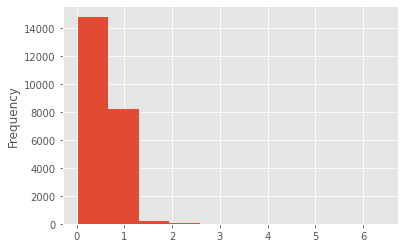

In [59]:
data_train.high_up.plot.hist()

<AxesSubplot:ylabel='Frequency'>

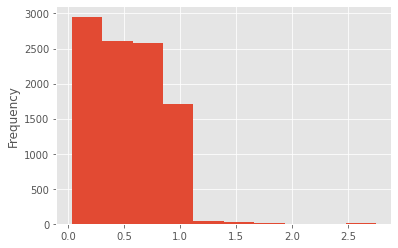

In [60]:
data_test.high_up.plot.hist()

floor generelt høyere i test, stories også generelt høyere. Ser også at high_up er ganske ulikt fordelt.
Tenker vi benytter high_up og dropper floor og stories i test mot kaggle.

<AxesSubplot:ylabel='Frequency'>

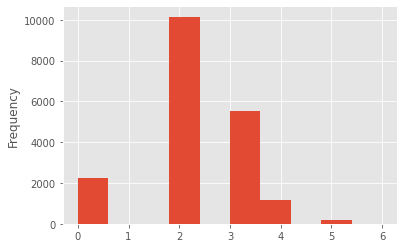

In [92]:
data_train.material.plot.hist(bins=10)

<AxesSubplot:ylabel='Frequency'>

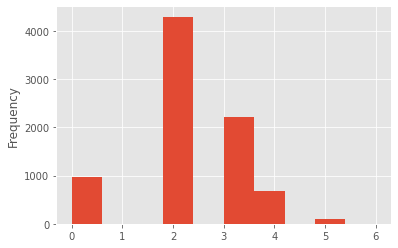

In [93]:
data_test.material.plot.hist(bins=10)

#mye mindre bygninger i data test, men lik fordeling.


